---
layout: default
title: "Deep Learning"
categories: deeplearning
permalink: /ML24/
order: 24
comments: true
---

In [2]:
%pylab --no-import-all inline
import pandas as pd
from copy import deepcopy as cp
from plot_ann import ann
from mpl_flow import Flow

Populating the interactive namespace from numpy and matplotlib


/home/marnec/.local/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Deep learning
While the concept of deep learning has been around since many years, it really took off some years ago. On one hand, from the advent of computers and internet we ha started to accumulate an enormous amount of data. On the other hand computational power has increased to the point that training very large neural network is now not only possible, but relatively easy. These two fact combined are the reason behind the popularization of deep learning algorithm, since large amount of data (more precisely labeled data) fed into very large neural networks, produce results unachievable by other models.

So in one word **scale** has been driving deep learning, scale of labeled data, of computational power and of the algorithm.

Incidentally many new technologies (i.e. types of neural networks) have been invented while trying to run large algorithms faster: for example, one of the fundamental breakthrough in ML has been switching from a sigmoid function to a RELU function (<a href="#fig:sigmoidrelu">figure below</a>). This is due to the fact that in the regions far from $0$, the parameters change very slowly, while with the ReLU the gradient descent is much more efficient.

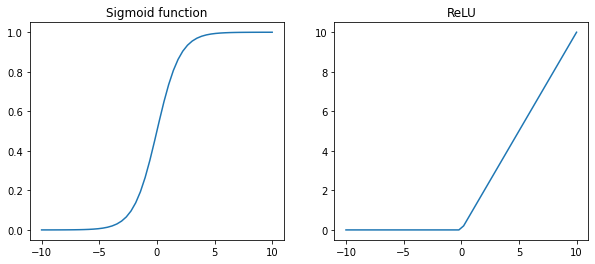

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax1, ax2 = axes

x = np.linspace(-10, 10)
ax1.plot(x, 1/(1 + np.exp(-x)))
ax1.set_title('Sigmoid function')
ax2.plot(x, np.maximum(x, 0))
ax2.set_title('ReLU');

<i id="fig:sigmoidrelu">Comparison between sigmoid function and ReLU</i>

## Deep representation
Why do deep neural networks work well? Deep neural networks build a hierarchical representation of training data.

Early layers of neural networks detect simpler functions and compose them together in following layers of the neural network in more complex functions (a possible example in <a href="#fig:audioexample">the figure below</a>).

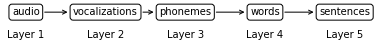

In [4]:
labels = ['audio', 'vocalizations', 'phonemes', 'words', 'sentences']
fig, ax = plt.subplots(figsize=(6, .5))
f = Flow()
nodes = [f.node(l) for l in labels]
[f.node('Layer {}'.format(i), travel='s', startpoint=n, bbox=dict(edgecolor='w'), connect=False) for i, n in enumerate(nodes, 1)];

<i id="fig:audioexample">An hypothesized example of increasingly complex features learned from a 5 layers-deep neural network trained on audio sources.</i>

A result from circuit theory states that:

> there are functions you can compute with a "small" L-layer deep neural network that shallower networks require exponentially more hidden units to compute.
    
Let's try to illustrate this with an example: as we have seen in <a href="page:ML11">ML-11</a> we can calculate logical functions with neural networks. Let's say we want to calculate the combined $\text{XOR}$ of our input vector $x$.

$$y=x_1 \text{XOR} x_2 \text{XOR} x_3 \text{XOR} \dots \text{XOR} x_n$$

To compute $y$ the depth of the neural network should be on the order of $O(\log n)$. However if we are forced to compute this function with just 1 hidden layer than in order to compute $y$ we will need $\sim 2^n$ hidden units.

## Notation
Let's take the deep neural network in <a href=#fig:deepann>the figure below</a>

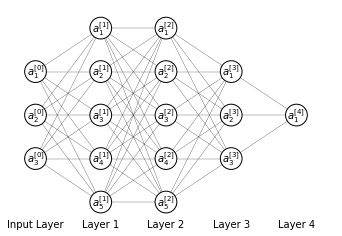

In [5]:
ax, *_ = ann([3, 5, 5, 3, 1], width=1.5, radius=2, node_labels=True, layer_labels=True)
ax.set_aspect('equal')

<i id="fig:deepann">A 4-layers deep neural network</i>

We say that this neural network as $L=4$ layers; input layer is included in the number of layers. Each layer has $n^{[l]}$ number of units. In this case:

$$
\begin{aligned}
& n^{[1]}=5 \qquad n^{[2]}=5 \qquad n^{[3]}=3 \qquad n^{[4]}=n^{[L]}=1 \qquad \\
& n^{[0]} = n_x=3
\end{aligned}
$$

The activations in each layer are referred to as $a^{[l]}$ and are computed as:

$$
a^{[l]} = g^{[l]}\left(z^{[l]}\right)
$$

where $z^{[l]}$ is calculated from parameters $W^{[l]}$ and bias $b^{[l]}$.

The input layer is referred to as $x = a^{[0]}$ and the output layer as $a^{[L]} = \hat{y}$

## Forward propagation
Forward propagation for a deep neural network follows the same process as for a shallow network, which is explained in detail in <a href="page:ML10">ML-10</a>. The process follows the general rule:

$$
\begin{aligned}
& Z^{[l]}=W^{[l]}A^{[l-1]}+b^{[l]} \\
& A^{[l]}=g^{[l]}(Z^{[l]})
\end{aligned}
$$

### Matrix dimensions
#### For a single example
Matrices mentioned in forward propagation have the following dimensions for a single training example:

$$
\begin{aligned}
z^{[l]} & \in \mathbb{R}^{(n^{[l]}, 1)} \\
W^{[l]} & \in \mathbb{R}^{(n^{[l]}, n^{[l-1]})} \\
a^{[l-1]} & \in \mathbb{R}^{(n^{[l-1]}, 1)} \\
b^{[l]} & \in \mathbb{R}^{(n^{[l]}, 1)}
\end{aligned}
$$
  
### For the whole training set
In the vectorized form across $m$ training examples the matrices have the following dimensions:

$$
\begin{aligned}
Z^{[l]} & \in \mathbb{R}^{(n^{[l]}, m)} \\
W^{[l]} & \in \mathbb{R}^{(n^{[l]}, n^{[l-1]})} \\
A^{[l-1]} & \in \mathbb{R}^{(n^{[l-1]}, m)} \\
b^{[l]} & \in \mathbb{R}^{(n^{[l]}, 1)}
\end{aligned}
$$

## Back propagation
As for a shallow neural network back propagation follows the general rule:

$$
\begin{aligned}
& dZ^{[l]} = dA^{[l]} g'^{[l]} \left( Z^{[l]} \right)\\
& dW^{[l]} = \frac{1}{m} dZ^{[l]} A^{[l-1]T} \\
& db^{[l]} = \frac{1}{m} \sum dZ^{[l]} \\
& dA^{[l-1]} = W^{[l]T} dZ^{[l]}
\end{aligned}
$$

Where the derivative of the final layer (if using the sigmoid  activation function) $dA^{[L]}$ is:

$$
dA^{[L]} = -\frac{y}{a}+\frac{(1-y)}{(1-a)}
$$

## Hyperparameters
Hyperparameters are settings that influence how the neural network learns the parameters $W$ and $b$. There are many hyperparameters in deep learning:
* The learning rate $\alpha$
* number of iterations
* number of hidden layers
* number of hidden units
* choice of activation functions
* other hyperparameters

There currently is no way of determining in advance optimal hyperparameters and the only way to find out what are good values for hyperparameters is to empirically test them. For this reason, especially nowadays, training a machine learning algorithm is an highly iterative process, where the best performing model is chosen among many others.

## Testing a model
In order to select the best performing algorithm it becomes essential to have a framework to test machine learning models. The common system is to split the dataset of examples in 3 separate subsets:

* **training set**: the set of examples on which the parameters are fitted
* **cross-validation set**: (also called hold-out or development set): the set of examples of which different models are tested and hyperparameters are chosen
* **test set**: the set of examples on which the performance of a model is measured

In early days of machine learning it was widely considered a good practice to split your dataset with a 70/30% or 60/20/20% ratio. And this is fine when the number of examples are in the order of $10^{2-4}$. But for deep-learning problems, where usually the number of examples is in the order of $10^{6}$, the fraction of data in the test and dev sets is much much smaller and a good split would be a 98/1/1%.

### Mismatched train/test distributions
When dealing with large amount of data it may happen that data in the training set and data in the dev or test set come from different distributions. This is generally not advisable in fact the rule if thumb is that train and dev set should **come from the same distribution**.

For example the training set might be fed by automatic data crawlers while the dev or test set might be fed data from users. This is generally fine as long as the dev and test sets come from the same distribution. It is extremely important that dev and test set come from the same distribution, since you are using the dev set to analyze if your algorithm generalizes well the problem.

### Omitting the test set
Since the goal of the test set is to provide a platform to obtain an un-biased estimate of the performance of the model, it is not required to have one in case we don't need to estimate such performance. The dev set on the other hand is absolutely necessary to chose the best performing model

## Transfer Learning
One of the most powerful ideas in deep learning is that sometimes you can take knowledge that was learned from one task and apply that knowledge to another task, in other words to **transfer learning**.

Suppose we trained the neural network in <a href="#fig:transf">the figure below</a> on object detection and we now want to transfer that knowledge to radiology diagnosis. We can transfer learning, by dropping the output layer and the layer before it, which feeds the processed-input directly in the output layer, and retrain by swapping the dataset with a new $x, y$ where $x$ is radiology images and $y$ is the diagnosis. In order to achieve that, we initialize the last layer weights ($w^{[L]} ,b^{[L]}$) randomly and retraining the neural network on the new dataset. Sometimes we can decide not only to retrain the dropped layers with new data, but to change the architecture of the dropped layers, maybe adding some more hidden layers between the trained layers and the output layer.

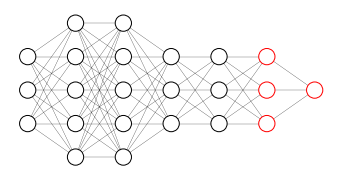

In [6]:
A = [3, 5, 5, 3, 3, 3, 1]
ax, *_ = ann(A, width=2, node_colors=['k']*(sum(A)-4) + ['r']*4, radius=2)
ax.set_aspect('equal')

<i id="fig:transf">A deep neural network trained for a specific task and repurposed for a different task by dropping the hidden units of the last two layers (red) and retrain only those.</i>

The rule of thumb to know how many layers to retrain is that if your new dataset is small, you should only retrain the hidden layer. The bigger your new dataset, the more hidden layers you can go back to retrain. In case you have enough data to retrain the entire network, then your first training is called **pre-training**, which becomes a step where you initialize the weights of the network with a learning process on a separate dataset, and your second training is called **fine-tuning**, in which the network is optimized for the target task.

Transfer learning makes sense when

* You have a lot of data from the task you are transferring from (task A) and relatively little data from the task you are transferring to (task B). If the opposite is true, then transfer learning doesn't make sense.
* Task A and task B have the same input $x$
* Low level features from task A could be helpful for learning task B.

## Multitask Learning
Whereas in transfer learning you have a sequential process: you learn task A and then transfer to task B; in **multitask learning** you start off by learning simultaneously with multiple tasks, with the rationale that each of the tasks should help all the other tasks.

Suppose you are building a self driving car system that needs to detect several different targets (e.g. pedestrians, cars, stop signs, traffic lights, ...). A typical image fed as input of the neural network will contain some of the object that need to be detected and lack some other. So the label vector $y^{(i)}$ associated to the input image $x{(i)}$ will be a (#targets, $1$) column vector and $Y$ will be a (#targets, $m$) matrix

$$
y^{(i)} = 
\begin{bmatrix}
0 \\ 1 \\ 1 \\ 0 \\ \vdots
\end{bmatrix} \qquad \qquad
Y = 
\begin{bmatrix}
| & | & & | \\
y^{(1)} & y^{(2)} & \dots & y^{(m)} \\
| & |  & & | 
\end{bmatrix} 
$$

In case our multitask neural network has 4 target tasks, it will look like that in <a href="#fig:multitasknn">the figure below</a>, with 4 units in the output layer.

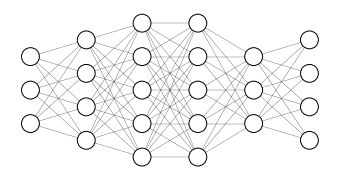

In [7]:
ax, *_ = ann([3, 4, 5, 5, 3, 4], width=2, radius=2)
ax.set_aspect('equal')

<i id="fig:multitasknn">A multitask neural network with 4 output units</i>

Since $\hat{y}^{(i)} \in \mathbb{R}^{4 \times 1}$, also the Loss function $\mathcal{L}\left(\hat{y}^{(i)}_j, y^{(i)}_j \right) \in \mathbb{R}^{4 \times 1}$ (where $\mathcal{L}$ is usual logistic loss) and the loss averaged over the whole dataset (Cost function) becomes

$$
\frac{1}{m} \sum_{i=1}^m \sum_{j=1}^4 \mathcal{L}\left(\hat{y}^{(i)}_j, y^{(i)}_j \right)
$$

Unlike softmax regression, in which one image is associated with one label chosen among many, in multitask learning a single image can have multiple labels. The same result can in principle be achieved by training 4 different neural networks, one for each target task, however if any of the earlier layers of the neural network are in common, than one multitask neural network will have better performance than 4 single task neural network. 

A multitask neural network can even be trained on incompletely label examples.

$$
Y = 
\begin{bmatrix}
0 & 1 & & 0 & & ?\\ 1 & 1 & \ldots & 1 & \ldots & 1 \\ ? & ? & & 1 & & ? \\ ? & ? & & 0 & & ?
\end{bmatrix}
$$

where the sum $\sum_{j=1}^4$ will only sum over defined values of $j$

Multitask learning makes sense when

* training on a set of tasks that could benefit from having shared lower-level features
* the amount of data for each task is similar
* you can train a big enough neural network to do well on all the tasks (the only situation in which multitask learning will hurt performance compared to single neural networks for each task is when the model is not big enough)

## End-to-End Learning
One of the most recent development of deep learning is end-to-end deep learning, that summarizes a learning system that requires multiple stages of processing into a single neural network.

Let's take an example in speech recognition, where from an audio source $x$ we obtain a transcript $y$. Traditionally, this requires multiple stages:

1. Manual feature extraction with MFCC
2. ML model for low level features, usually phonemes.
3. ML model for building words from phonemes
4. ML model for building a transcript from words.

End-to-end learning maps directly from audio to transcript (<a href="#fig:e2elearn">figure below</a>).

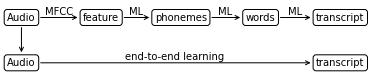

In [13]:
f = Flow(figsize=(6, 1))
f.node(label='Audio')
f.node('feature', edgelabel='MFCC')
f.node('phonemes', edgelabel='ML')
f.node('words', edgelabel='ML')
f.node('transcript', edgelabel='ML')
f.node('Audio', travel='s', startpoint=1)
f.node('transcript', distance=4, edgelabel='end-to-end learning');

<i id="fig:e2elearn">An example of a task faced with a early machine learning approach and with end-to-end learning</i>

End-to-end learning is able to map directly the audio source $x$ to the transcript $y$, only if a lot of data is available. For example, if only 3000 hours of audio source are available, then the traditional approach will perform better; but if 10000 or more hours of audio source are available then end-to-end learning might be a better approach.

### Whether to use end-to-end learning
The key question to ask yourself when deciding if applying end-to-end learning is:

> Do you have sufficient data to learn a function of the complexity needed to map $x$ to $y$?

A real-world example where end-to-end learning is **not** applied is identity confirmation systems. Some companies have replaced badge pass with identification through pictures. Some pictures of you are taken at the gate and, if your identity is confirmed, you can pass. The problem is that the picture taken can have many different angles, lighting conditions, and subject positioning. What is done today to solve this problem is to split it in two steps:

1. An algorithm detects, isolates and centers the portion of the picture that contains the face of the person
2. The face picture is fed into a model trained on the task to compare two pictures and tell if they are of the same person. The taken picture is the compared with a database of allowed personnel.

The reason why end-to-end learning is not applied for this task, is that we have a lot of data to train models on the single tasks, but very little data to train the model on the complete task. So a split approach is better in this case.

On the other side of the coin, end-to-end learning performs very well on machine translation problems. These problems used to pass through very complicated steps of language analysis, however, nowadays we have a large amount of data in the form of: sentence in language A ($x$), its translation in language B ($y$). This is an ideal setting to apply end-to-end learning and in fact it works quite well in this field.

#### end-to-end learning advantages

* end-to-end learning let the data speak. If you have enough data mappging from $x \to y$ than it is better to let the neural network figure out the representation that most suits the task and avoid forcing human preconception upon learning. An example of human preconception in speech recognition are phonemes that work for people to represent basic sound features but they are not necessarily the best representation of speech for the task of speech recognition. 
* less hand-designing of components needed. This also simplify the design workflow.

#### end-to-end learning disadvantages 

* end-to-end learning may need a large amount of data. Usually it's easier to obtain large amount of data for subtasks and harder to directly mapping far away $x$ and $y$
* excludes potentially useful hand-designed components. Sometimes, especially when you have little data, hand-designed components or features might be very useful.